In [5]:
%load_ext autoreload
%autoreload 2

In [1]:
from models.adam import ADAM
from models.irls import IRLS
from models.sgd import SGD
from datasets.read import read_all_datasets

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Task 3.4
Compare the classification performance of logistic regression (try all 3 methods: IWLS, SGD and ADAM) and 4 popular classification methods: LDA (Linear Discriminant analysis), QDA (Quadratic Discriminant Analysis), Decision tree and Random Forest. 
Use available implementations, e.g. from scikit-learn library.

In [3]:
# Load saved datasets
import cloudpickle

try:
    with open('datasets.pkl', 'rb') as f:
        datasets = cloudpickle.load(f)
        print("Loaded datasets from file")
except FileNotFoundError:
    datasets = None

if datasets is None:
    datasets = read_all_datasets('datasets/')


Loaded datasets from file


In [9]:
# Save datasets
import cloudpickle

with open('datasets.pkl', 'wb') as f:
    cloudpickle.dump(datasets, f)

In [4]:
# Print shapes of datasets
for dataset_name, dataset in datasets.items():
    X, y = dataset
    print(f"{dataset_name}: {X.shape}, {y.shape}")

Rice_Cammeo_Osmancik: (3810, 3), (3810,)
Online_Shoppers_intention: (12330, 17), (12330,)
Dataset_for_Link_Phishing: (19431, 77), (19431,)
Banknote_Authentication: (1372, 4), (1372,)
Optdigits: (5620, 59), (5620,)
EEG_Eye_State: (14980, 7), (14980,)
Web_Page_Phishing: (100077, 19), (100077,)
Statlog_Shuttle: (58000, 6), (58000,)
Airline_Passenger_Satisfaction: (64744, 21), (64744,)


In [25]:
import traceback
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

iterations = 5
test_size = 0.3
methods = [
    ("LDA", lambda: LinearDiscriminantAnalysis()),
    ("QDA", lambda: QuadraticDiscriminantAnalysis()),
    ("Decision Tree", lambda: DecisionTreeClassifier()),
    ("Random Forest", lambda: RandomForestClassifier()),
    ("IWLS", lambda: IRLS(iter_limit=10)),
    ("SGD", lambda: SGD(iter_limit=500)),
    ("ADAM", lambda: ADAM(iter_limit=500))
]

results_by_dataset_and_method = {}

# Load saved results
import json

try:
    with open('task3.4_3.5_results/results.json', 'r') as f:
        results_by_dataset_and_method = json.load(f)
        print("Loaded results from file")
except FileNotFoundError:
    pass

# First collect results 
for dataset_name, dataset in datasets.items():
    if dataset_name in results_by_dataset_and_method:
        print(f"Skipping {dataset_name}")
        continue
    
    results_by_method = {}
    for method_name, method in methods:
        results = {
            "accuracy": [],
            "f1": [],
            "precision": [],
            "recall": []
        }
        
        tqdm._instances.clear()
        
        bar = tqdm(total=iterations)
        bar.set_description(f"Processing {method_name} on {dataset_name}")
        max_attempts = 10
        current_iteration = 0
        while current_iteration < iterations:
            try:
                X, y = dataset
                method_instance = method()
    
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
                method_instance.fit(X_train, y_train)
                y_pred = method_instance.predict(X_test)
                results["accuracy"].append(balanced_accuracy_score(y_test, y_pred))
                results["f1"].append(f1_score(y_test, y_pred))
                results["precision"].append(precision_score(y_test, y_pred))
                results["recall"].append(recall_score(y_test, y_pred))

                bar.update(1)
                current_iteration += 1
            except Exception as e:
                # print(f"Error in {method_name} on {dataset_name} iteration {current_iteration}: {e}, attempts left: {max_attempts}")
                # traceback.print_exc()
                # max_attempts -= 1
                # 
                # if max_attempts == 0:
                raise
            
        bar.close()
        results_by_method[method_name] = results
    results_by_dataset_and_method[dataset_name] = results_by_method
    
    # Save results
    with open('task3.4_3.5_results/results.json', 'w') as f:
        json.dump(results_by_dataset_and_method, f)

Loaded results from file
Skipping Rice_Cammeo_Osmancik
Skipping Online_Shoppers_intention
Skipping Dataset_for_Link_Phishing
Skipping Banknote_Authentication
Skipping Optdigits
Skipping EEG_Eye_State
Skipping Web_Page_Phishing
Skipping Statlog_Shuttle
Skipping Airline_Passenger_Satisfaction


In [ ]:
# Save results
import json

with open('task3.4_3.5_results/results.json', 'w') as f:
    json.dump(results_by_dataset_and_method, f)


In [30]:
results_by_dataset_and_method

{'Rice_Cammeo_Osmancik': {'LDA': {'accuracy': [0.9234911953463375,
    0.9282208109122763,
    0.9247241928930837,
    0.9274294522918174,
    0.9117825029157627],
   'f1': [0.9087093389296957,
    0.917864476386037,
    0.9129129129129129,
    0.9139344262295082,
    0.8977505112474438],
   'precision': [0.8964803312629399,
    0.9197530864197531,
    0.8958742632612967,
    0.8955823293172691,
    0.888663967611336],
   'recall': [0.9212765957446809,
    0.9159836065573771,
    0.9306122448979591,
    0.9330543933054394,
    0.9070247933884298]},
  'QDA': {'accuracy': [0.9238997074275648,
    0.9286720986566835,
    0.9163993066498581,
    0.934325172083297,
    0.9263617969713256],
   'f1': [0.9117647058823529,
    0.9166666666666666,
    0.9022082018927445,
    0.9255213505461768,
    0.9119496855345912],
   'precision': [0.9156118143459916,
    0.9128630705394191,
    0.9012605042016807,
    0.9173228346456693,
    0.8987603305785123],
   'recall': [0.9079497907949791,
    0.92050

In [33]:
# Show mean accuracy table for all methods
import pandas as pd

mean_accuracies = pd.DataFrame(
    {
        dataset_name: {
            method_name: results["accuracy"]
            for method_name, results in results_by_method.items()
        }
        for dataset_name, results_by_method in results_by_dataset_and_method.items()
    }
)

mean_accuracies = mean_accuracies.applymap(lambda x: sum(x) / len(x))
mean_accuracies

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_20264/4285289090.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mean_accuracies = mean_accuracies.applymap(lambda x: sum(x) / len(x))


,Rice_Cammeo_Osmancik,Online_Shoppers_intention,Dataset_for_Link_Phishing,Banknote_Authentication,Optdigits,EEG_Eye_State,Web_Page_Phishing,Statlog_Shuttle,Airline_Passenger_Satisfaction
LDA,0.923130,0.649858,0.928667,0.979041,0.945621,0.551345,0.772675,0.793295,0.865312
QDA,0.925932,0.738491,0.697541,0.991363,0.676965,0.541889,0.509566,0.823398,0.846338
Decision Tree,0.879000,0.743293,0.971464,0.976878,0.924174,0.721342,0.867490,0.999522,0.917510
Random Forest,0.912492,0.765075,0.986750,0.990959,0.928328,0.810572,0.878404,0.999600,0.943451
IWLS,0.930559,0.621506,0.928296,0.985762,0.905960,0.528020,0.772088,0.780804,0.864287
SGD,0.925204,0.658077,0.945288,0.975670,0.957786,0.524927,0.827557,0.933055,0.877618
ADAM,0.923960,0.663858,0.944436,0.989224,0.971440,0.577217,0.828912,0.934337,0.878338


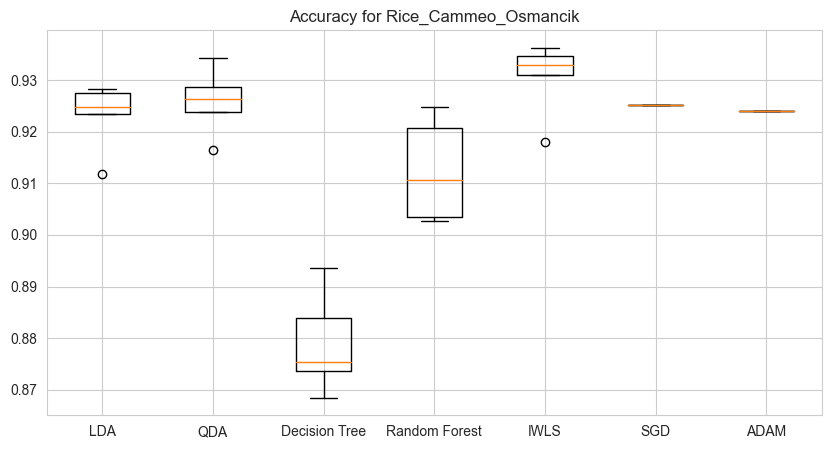

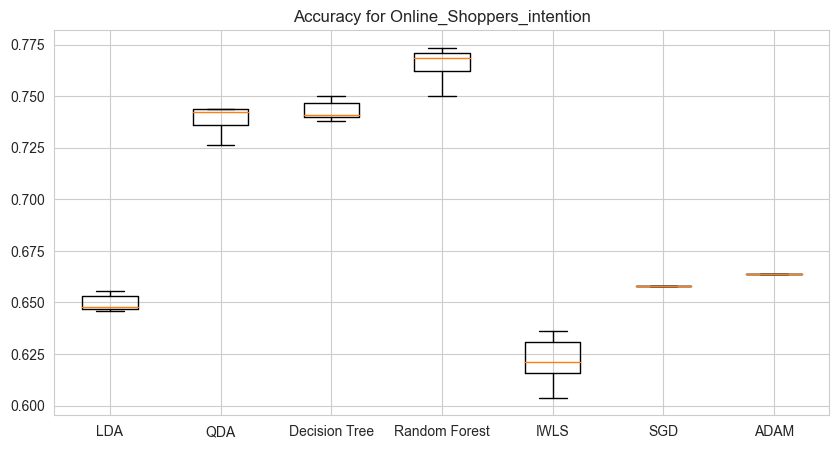

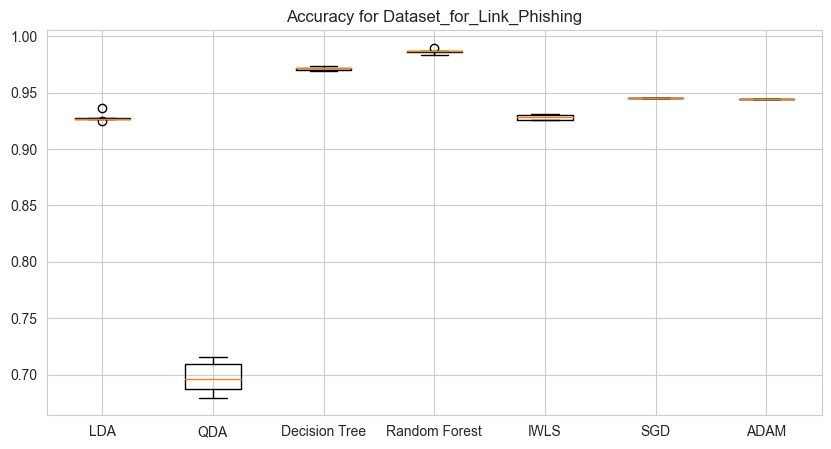

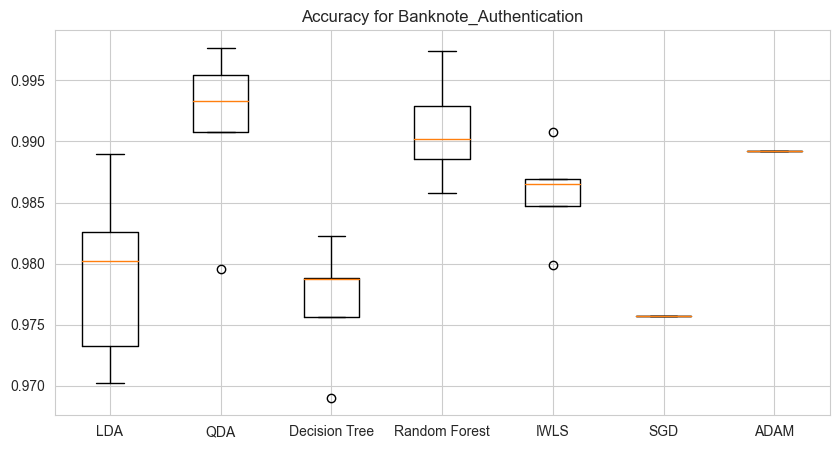

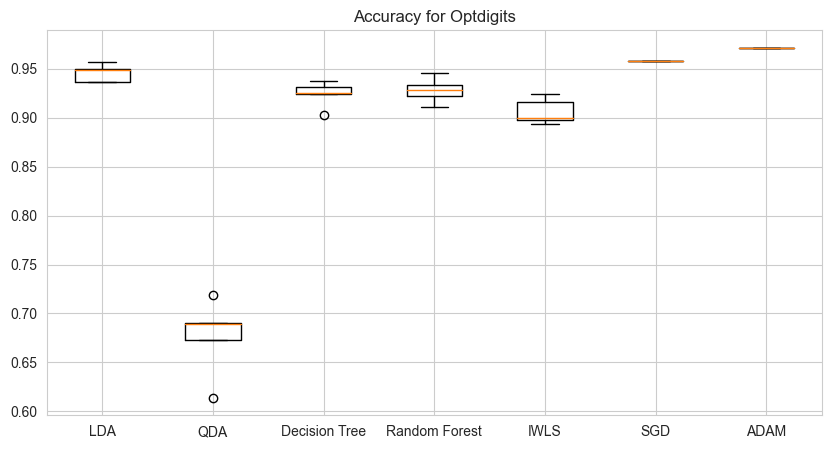

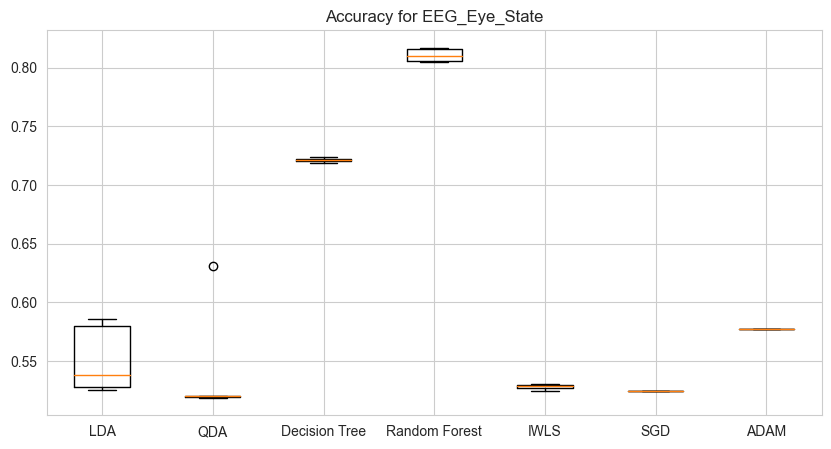

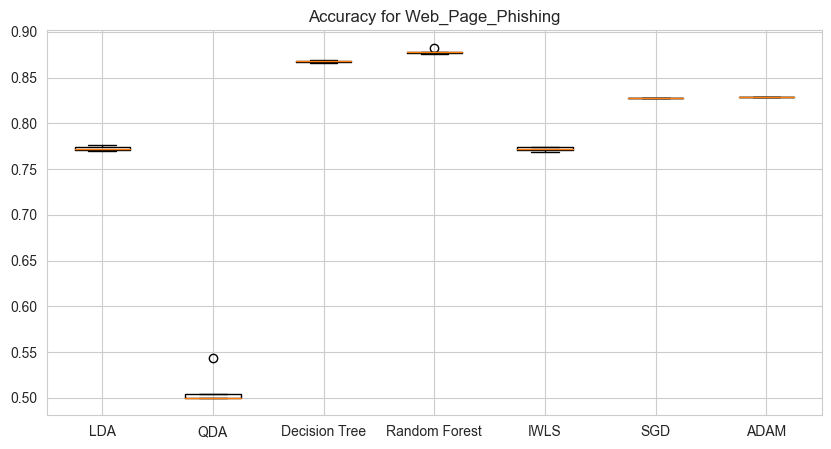

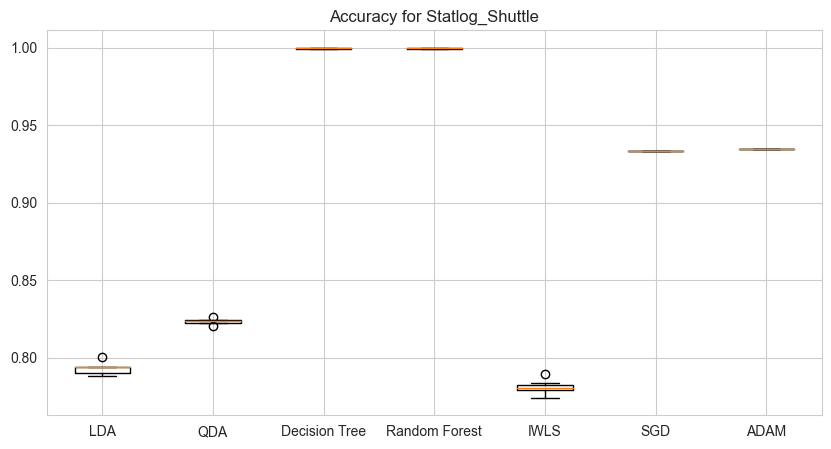

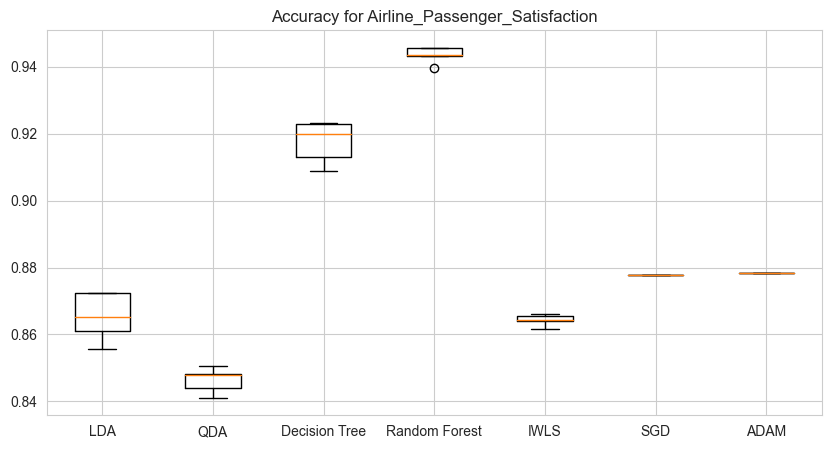

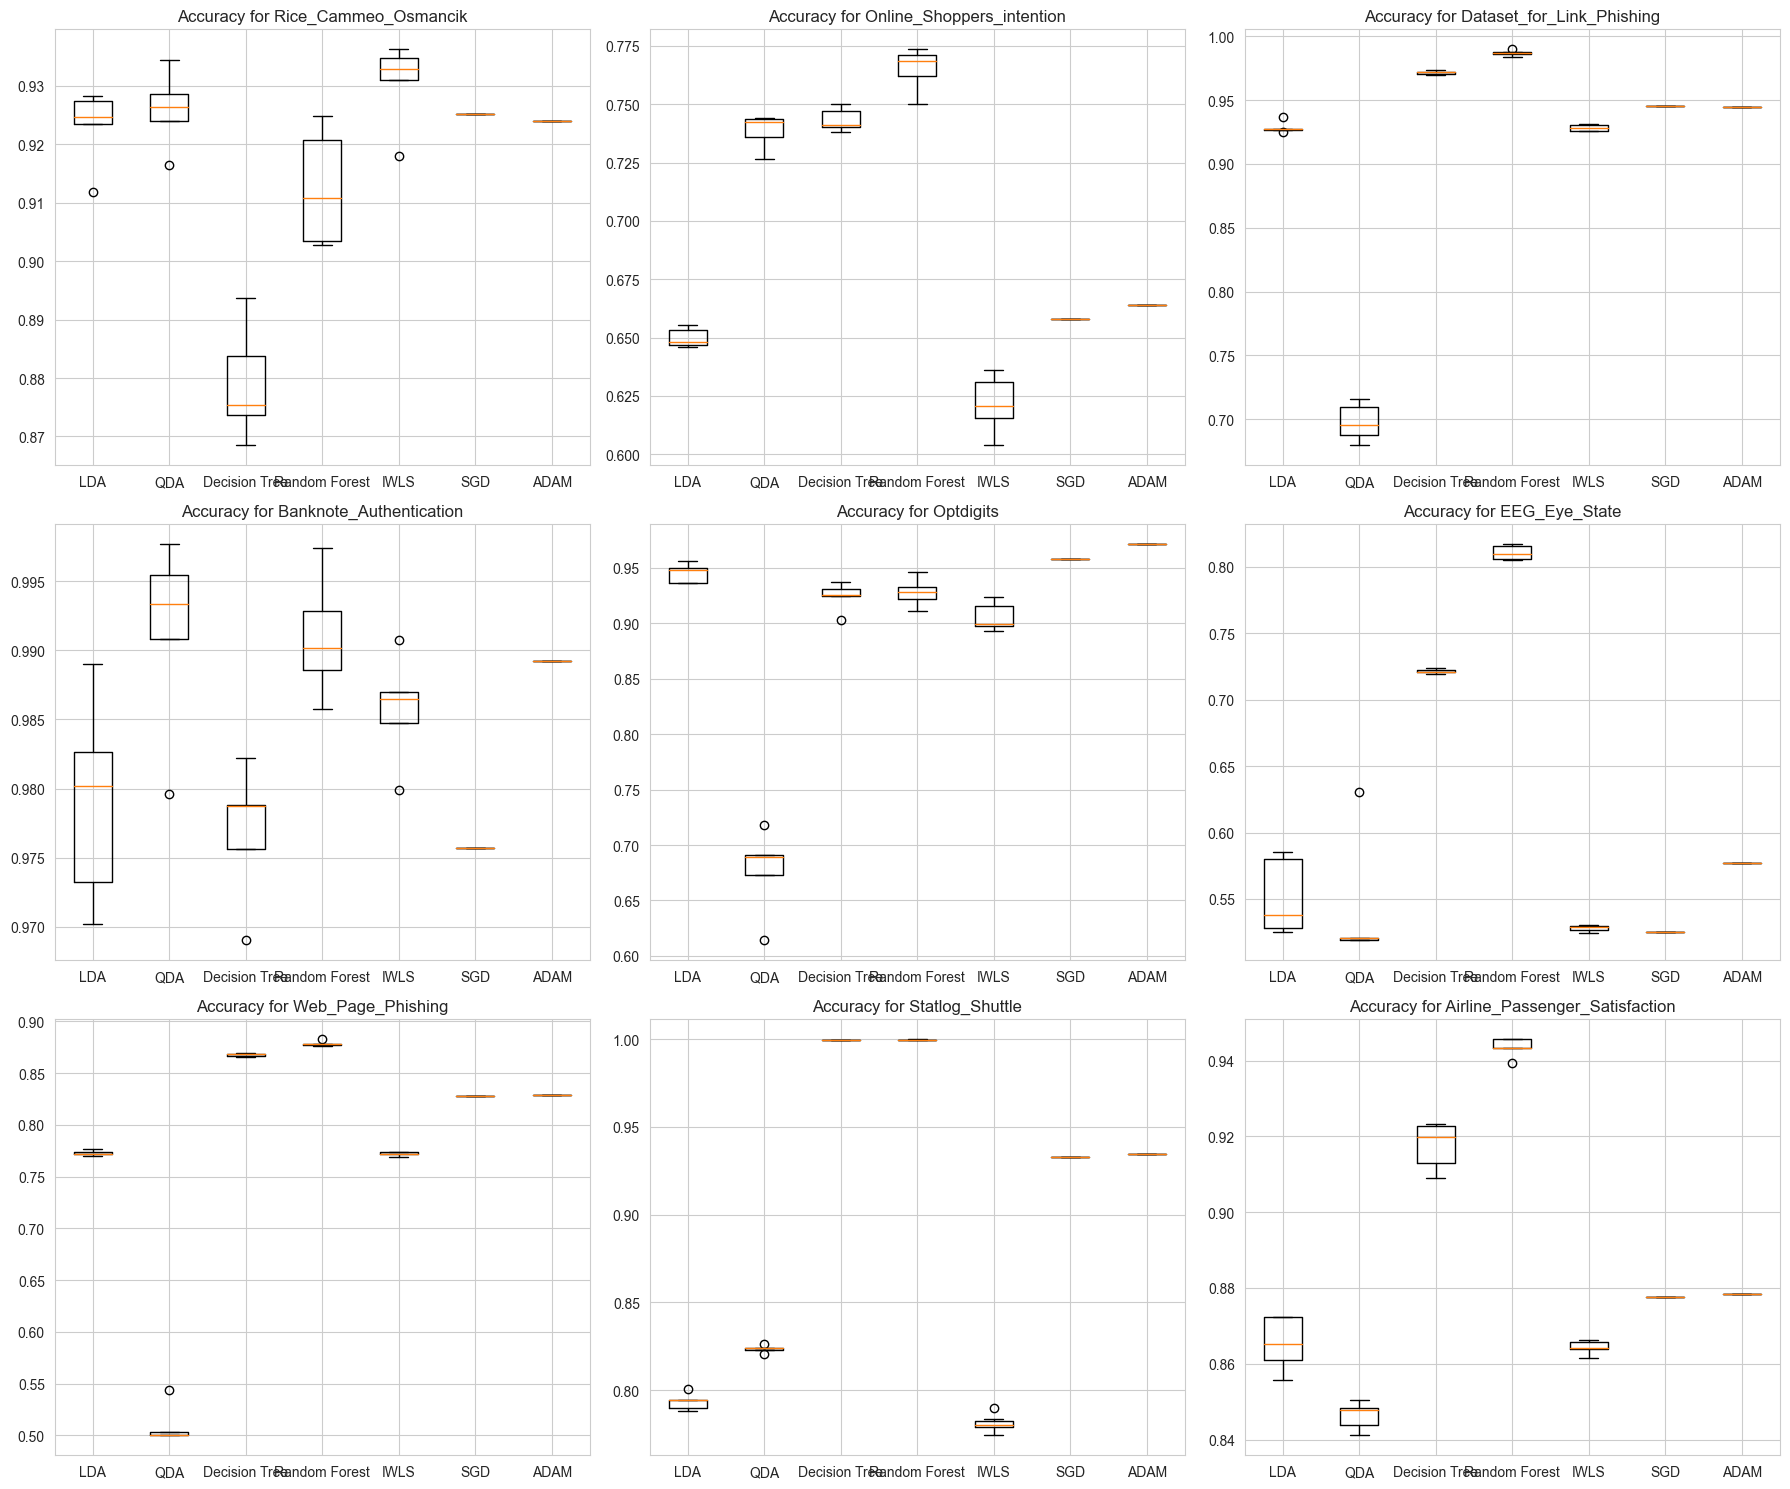

In [29]:
# Plot boxplots only for accuracy in 3x4 grid 

import matplotlib.pyplot as plt

for dataset_name, results_by_method in results_by_dataset_and_method.items():
    accuracies = []
    method_names = []
    for method_name, results in results_by_method.items():
        accuracies.append(results["accuracy"])
        method_names.append(method_name)

    plt.figure(figsize=(10, 5))
    plt.boxplot(accuracies)
    plt.xticks(range(1, len(method_names) + 1), method_names)
    plt.title(f"Accuracy for {dataset_name}")
    plt.show()

fig, axs = plt.subplots(3, 3, figsize=(18, 15))

for i, (dataset_name, results_by_method) in enumerate(results_by_dataset_and_method.items()):
    accuracies = []
    method_names = []
    for method_name, results in results_by_method.items():
        accuracies.append(results["accuracy"])
        method_names.append(method_name)
    
    axs[i // 3, i % 3].boxplot(accuracies)
    axs[i // 3, i % 3].set_xticks(range(1, len(method_names) + 1))
    axs[i // 3, i % 3].set_xticklabels(method_names)
    axs[i // 3, i % 3].set_title(f"Accuracy for {dataset_name}")

plt.tight_layout()

# Task 3.5
In the case of small datasets, please compare the two versions of the logistic regression: model without interactions and model with interactions. This gives a total of 6 variants of logistic regression (IWLS, SGD, ADAM, IWLS+INT, SGD+INT, ADAM+INT).


In [24]:
# Infuse IWLS with interactions
import traceback
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

iterations = 10
test_size = 0.3

methods = [
    ("IWLS", False, lambda: IRLS(iter_limit=10)),
    ("IWLS+INT", True, lambda: IRLS(iter_limit=10)),
    ("SGD", False, lambda: SGD(iter_limit=500)),
    ("SGD+INT", True, lambda: SGD(iter_limit=500)),
    ("ADAM", False, lambda: ADAM(iter_limit=500)),
    ("ADAM+INT", True, lambda: ADAM(iter_limit=500)),
]

small_datasets = {
    'Rice_Cammeo_Osmancik': datasets['Rice_Cammeo_Osmancik'],
    'Statlog_Shuttle': datasets['Statlog_Shuttle'],
    'Banknote_Authentication': datasets['Banknote_Authentication'],
}

results_by_dataset_and_method_35 = {}

# Load saved results
import json

try:
    with open('task3.4_3.5_results/results_3.5.json', 'r') as f:
        results_by_dataset_and_method_35 = json.load(f)
        print("Loaded results from file")
except FileNotFoundError:
    pass


# First collect results
for dataset_name, dataset in small_datasets.items():
    if dataset_name in results_by_dataset_and_method_35:
        print(f"Skipping {dataset_name}")
        continue
    
    results_by_method = {}
    for method_name, should_use_interactions, method in methods:
        results = {
            "accuracy": [],
            "f1": [],
            "precision": [],
            "recall": []
        }
        
        tqdm._instances.clear()
        
        bar = tqdm(total=iterations)
        bar.set_description(f"Processing {method_name} on {dataset_name}")
        max_attempts = 10
        current_iteration = 0
        while current_iteration < iterations:
            try:
                X, y = dataset
                method_instance = method()
    
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
                
                interactions = [
                    (i, j)
                    for i in range(X_train.shape[1])
                    for j in range(i + 1, X_train.shape[1])
                ]
                
                if not should_use_interactions:
                    method_instance.fit(X_train, y_train)
                else:
                    method_instance.fit(
                        X_train, 
                        y_train, 
                        interactions=interactions
                    )
                
                y_pred = (
                    method_instance.predict(X_test)
                    if not should_use_interactions
                    else method_instance.predict(X_test, interactions=interactions)
                )
                results["accuracy"].append(balanced_accuracy_score(y_test, y_pred))
                results["f1"].append(f1_score(y_test, y_pred))
                results["precision"].append(precision_score(y_test, y_pred))
                results["recall"].append(recall_score(y_test, y_pred))

                bar.update(1)
                current_iteration += 1
            except Exception as e:
                print(f"Error in {method_name} on {dataset_name} iteration {current_iteration}: {e}, attempts left: {max_attempts}")
                traceback.print_exc()
                max_attempts -= 1
                
                if max_attempts == 0:
                    raise
            
        bar.close()
        results_by_method[method_name] = results
    results_by_dataset_and_method_35[dataset_name] = results_by_method
    
    # Save results
    with open('task3.4_3.5_results/results_3.5.json', 'w') as f:
        json.dump(results_by_dataset_and_method_35, f)


Loaded results from file
Skipping Rice_Cammeo_Osmancik
Skipping Statlog_Shuttle
Skipping Banknote_Authentication


In [8]:
# Save results
import json

with open('task3.4_3.5_results/results_3.5.json', 'w') as f:
    json.dump(results_by_dataset_and_method_35, f)

In [10]:
results_by_dataset_and_method_35

{'Rice_Cammeo_Osmancik': {'IWLS': {'accuracy': [0.9290412109424335,
    0.9287801659125188,
    0.9210157513889063,
    0.9202990227850626,
    0.9242451840639152,
    0.9219093522746491,
    0.9363821819807736,
    0.9209232441617833,
    0.927367391372945,
    0.9292159420108103],
   'f1': [0.9143446852425181,
    0.9155645981688708,
    0.9081632653061225,
    0.9083820662768031,
    0.911522633744856,
    0.9087261785356068,
    0.9283611383709519,
    0.9092741935483871,
    0.9130434782608695,
    0.9174311926605505],
   'precision': [0.8913480885311871,
    0.8946322067594433,
    0.8971774193548387,
    0.879245283018868,
    0.9022403258655805,
    0.8864970645792564,
    0.9184466019417475,
    0.9001996007984032,
    0.8945233265720081,
    0.9054325955734407],
   'recall': [0.9385593220338984,
    0.9375,
    0.9194214876033058,
    0.9395161290322581,
    0.920997920997921,
    0.9320987654320988,
    0.9384920634920635,
    0.9185336048879837,
    0.9323467230443975,
    

In [34]:
# Show mean accuracy table for all methods

mean_accuracies_35 = pd.DataFrame(
    {
        dataset_name: {
            method_name: results["accuracy"]
            for method_name, results in results_by_method.items()
        }
        for dataset_name, results_by_method in results_by_dataset_and_method_35.items()
    }
)

mean_accuracies_35 = mean_accuracies_35.applymap(lambda x: sum(x) / len(x))

mean_accuracies_35

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_20264/3578071012.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mean_accuracies_35 = mean_accuracies_35.applymap(lambda x: sum(x) / len(x))


,Rice_Cammeo_Osmancik,Statlog_Shuttle,Banknote_Authentication
IWLS,0.925918,0.780804,0.977832
IWLS+INT,0.922714,0.808689,0.986434
SGD,0.925204,0.933055,0.975670
SGD+INT,0.926212,0.964504,0.980603
ADAM,0.923960,0.934337,0.989224
ADAM+INT,0.925741,0.995221,1.000000


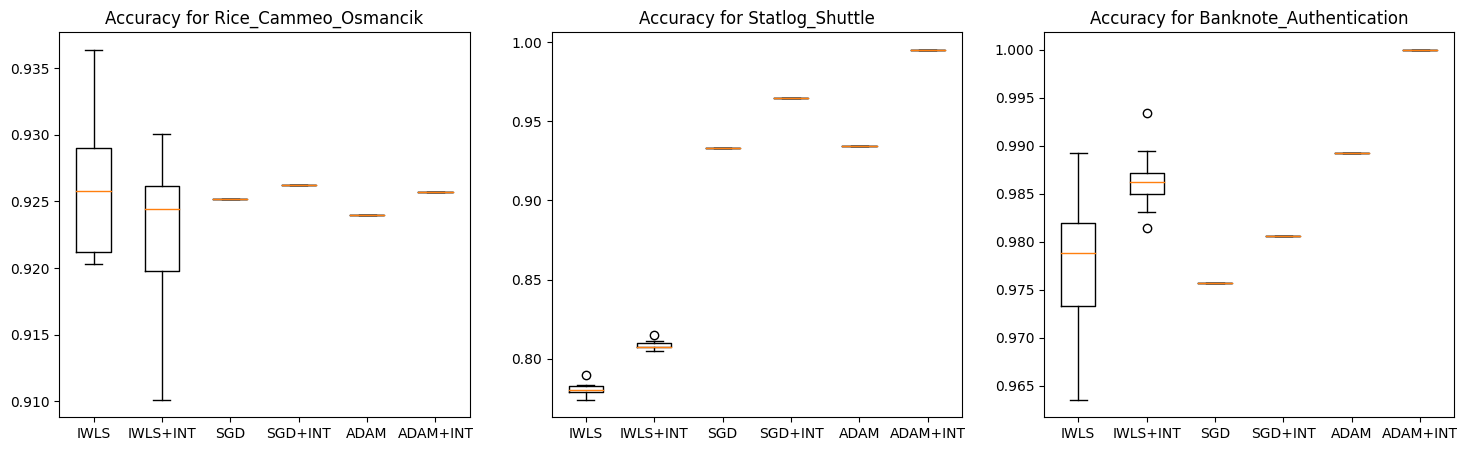

In [18]:
# Plot boxplots only for accuracy in one 3x1 row plot

import matplotlib.pyplot as plt
# 
# for dataset_name, results_by_method in results_by_dataset_and_method_35.items():
#     accuracies = []
#     method_names = []
#     for method_name, results in results_by_method.items():
#         accuracies.append(results["accuracy"])
#         method_names.append(method_name)
#     
#     plt.figure(figsize=(10, 5))
#     plt.boxplot(accuracies)
#     plt.xticks(range(1, len(method_names) + 1), method_names)
#     plt.title(f"Accuracy for {dataset_name}")
#     plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (dataset_name, results_by_method) in enumerate(results_by_dataset_and_method_35.items()):
    accuracies = []
    method_names = []
    for method_name, results in results_by_method.items():
        accuracies.append(results["accuracy"])
        method_names.append(method_name)
    
    axs[i].boxplot(accuracies)
    axs[i].set_xticks(range(1, len(method_names) + 1))
    axs[i].set_xticklabels(method_names)
    axs[i].set_title(f"Accuracy for {dataset_name}")